In [ ]:
import time
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.ui import Select             #To use implcit and explicit wait
from selenium.webdriver.support import expected_conditions as EC           #use in explicitly wait
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup                                              #work with attribute 
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException

## LOGIN 

In [22]:
driver = webdriver.Chrome(executable_path = r'\Users\spars\Downloads\chromedriver')             #invoke chrome webdriver
driver.get('https://www.instagram.com/')
time.sleep(2)
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')

username.click()
username.send_keys('**************')      #pass your own instagram username and password
time.sleep(1)

password.click()
password.send_keys('************')
time.sleep(1)

log_in=driver.find_element_by_xpath('//div[text()="Log In"]')
log_in.click()
time.sleep(4)

# credential storage
try:
    credentials= driver.find_element_by_xpath('//button[text()="Not Now"]')
    credentials.click()
    time.sleep(1)
except:
    pass

#  notifications
try:
    notifications = driver.find_element_by_xpath('//button[text()="Not Now"]')
    notifications.click()
    time.sleep(1)
except:
    pass


## Top 10 Instagram Handles when searched 'food' 

In [26]:
search=driver.find_element_by_xpath('//span[text()="Search"]')
search.click()
time.sleep(1)
searchfood= driver.find_element_by_xpath('//input[@placeholder="Search"]')
searchfood.send_keys('food')
time.sleep(2)
handles=driver.find_elements_by_xpath('//div[@class = "fuqBx"]//a["href"]')
time.sleep(1)
food_list=[]
for i in handles:
    if 'explore' in i.get_attribute('href'):                                    #if explore present in link then it is hastags
        continue
    else:       
        s = i.get_attribute('href').split('/')                                  #https://www.instagram.com/foodtalkindia                                    # after split s= ['https:','','www.instagram.com','foodtalkindia']
        food_list.append(s[3])
        
search=driver.find_element_by_xpath('//div[contains(@class,"aIYm8")]')
search.click()
newfoodlist=food_list[0:10]
newfoodlist

['__foodmachine___',
 'the_foodie_x',
 'delhifoodwalks',
 'yourfoodlab',
 'dehradun_street_food',
 'kotha.anish',
 'food',
 'foodys',
 'food_relating_tales',
 'mumbaifoodie']

## Top 5 Handles with max followers from list of above 10 followers

In [140]:
foodict={}
for i in newfoodlist:
    search=driver.find_element_by_xpath('//span[text()="Search"]')
    search.click()
    time.sleep(1)
    searchfood= driver.find_element_by_xpath('//input[@placeholder="Search"]')
    searchfood.send_keys(i)
    count = 0
    while count <3:
        searchfood.send_keys(Keys.ENTER)                     
        count +=1 # count = count +1
        time.sleep(1)
    time.sleep(1)
    num=driver.find_element_by_xpath('//li//span[@title]')
    time.sleep(1)
    val=num.get_attribute('title')
    ans=int("".join(val.split(',')))
    foodict[i]=ans
ans=sorted(foodict.items(), key=lambda kv: kv[1], reverse=True)[:5]
ans

    
    

[('foodys', 8806857),
 ('yourfoodlab', 1581180),
 ('mumbaifoodie', 485511),
 ('delhifoodwalks', 137247),
 ('food_relating_tales', 4251)]

## Number of Posts from above 5 Instagram handles in last 3 days 

In [64]:
from datetime import datetime
from datetime import date
poststop5={}
for i in dict(ans):
    search=driver.find_element_by_xpath('//span[text()="Search"]')
    search.click()
    time.sleep(1)
    searchfood= driver.find_element_by_xpath('//input[@placeholder="Search"]')
    searchfood.send_keys(i)
    count = 0
    while count <3:
        searchfood.send_keys(Keys.ENTER)                     
        count +=1 # count = count +1
        time.sleep(1)
    time.sleep(1)
    media_element = driver.find_element_by_xpath('//div[@class="eLAPa"]')
    media_element.click()
    time.sleep(2)
    for  j in range(25):
        postdate=driver.find_element_by_xpath('//time[@datetime]')
        val=postdate.get_attribute('datetime')
        start_date = datetime.strptime(val.split('T')[0], "%Y-%m-%d")
        end_date = datetime.strptime(str(date.today()), "%Y-%m-%d")
        if(abs(end_date-start_date).days<=3):
            numpost+=1
        else:
            break
        next_button = driver.find_element_by_xpath('//a[text()="Next"]')
        next_button.click()
        time.sleep(2)
    poststop5[i]=j
    close = driver.find_element_by_xpath('//*[@aria-label="Close"]')
    close.click()
poststop5
    
    

{'foodys': 11,
 'yourfoodlab': 2,
 'mumbaifoodie': 9,
 'delhifoodwalks': 5,
 'food_relating_tales': 0}

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  Intsa Handles vs Number of posts in last 3 days

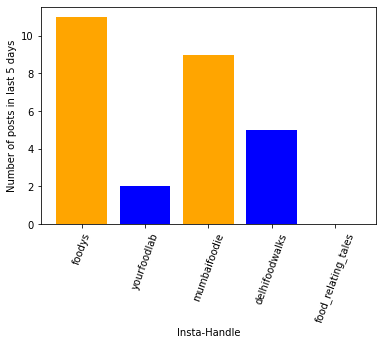

In [75]:
plt.bar(poststop5.keys(),poststop5.values(),width=0.8,color=['orange','blue'])
plt.xlabel('Insta-Handle')
plt.ylabel('Number of posts in last 5 days')
plt.xticks(rotation=70)
plt.show()   #NOTE food_relating_tales did not post anything in past 3 days


## Scrapping contents from last 10 posts of above 5 Insta Handles 

In [98]:
topfive={}
for i in dict(ans):
    topten={}
    search=driver.find_element_by_xpath('//span[text()="Search"]')
    search.click()
    time.sleep(1)
    searchfood= driver.find_element_by_xpath('//input[@placeholder="Search"]')
    searchfood.send_keys(i)
    count = 0
    while count <3:
        searchfood.send_keys(Keys.ENTER)                     
        count +=1 # count = count +1
        time.sleep(1)
    media_element = driver.find_element_by_xpath('//div[@class="eLAPa"]')
    media_element.click()
    time.sleep(1)
    for j in range(10):
        content=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
        topten['Post Number '+str(j+1)]=str(content.text)
        time.sleep(2)
        next_button = driver.find_element_by_xpath('//a[text()="Next"]')
        next_button.click()
        time.sleep(2)
    close = driver.find_element_by_xpath('//*[@aria-label="Close"]')
    close.click()
    topfive[i]=topten
for key in topfive.keys():
    p=topfive[key]
    print(key)
    k=0
    for key in p:
        print("-------------------------------------Post Number ",(k+1),"----------------------------------------")
        print(p[key])
        k=k+1
        print()
    
    

foodys
-------------------------------------Post Number  1 ----------------------------------------
Deliciousness level 100000 📈🤤 Should we bring back the drool meter? @cheatmeats 🎶: @1glaive #astrid #music

-------------------------------------Post Number  2 ----------------------------------------
Looking for a healthy & delicious dinner? Check out this oven baked one-pan Middle Eastern beef stew 🥩🥕🥔 Full recipe over at @feelgoodfoodie

-------------------------------------Post Number  3 ----------------------------------------
Could you and your best friend finish this??

Fries topped with cheese, döner meat, chicken & curry sauce 🍟😍 @trufoody

-------------------------------------Post Number  4 ----------------------------------------
Chapgetti Nood-Fries & Flaming Corn Kim-Cheese Fries! 🍟🔥 @hungryhugh 🎶: @1glaive #astrid #music

-------------------------------------Post Number  5 ----------------------------------------
Who else can’t wait for Kamp Koral!? Kamp Koral streams on @P

## List of words used along with their frequency 

In [111]:
freq={}
listofwords=[]
for key in topfive.keys():
    post=topfive[key]
    for key in post:
        data=post[key]
        word=data.split()
        for i in word:
            if i[0]=='#':                                               #only fetching hastages
                newword=i[1:]
                listofwords.append(newword)
                if newword in freq:
                    freq[newword]+=1
                else:
                    freq[newword]=1
print("Words with Frequency")
print()
print(freq) 
print()
print('---------------------------------------------------------------------------------------------------------------')
print("List Of Words")
print()
print(set(listofwords))



Words with Frequency

{'astrid': 3, 'music': 3, 'ad': 1, 'coachella': 1, 'pattice': 2, 'food': 11, 'chole': 2, 'chutney': 4, 'foodporn': 7, 'streetfood': 5, 'indiancuisine': 4, 'foodie': 12, 'mumbai': 2, 'mumbaifood': 4, 'mumbaistreetfood': 3, 'sanjyotkeer': 2, 'recipes': 2, 'soup': 1, 'souplover': 1, 'foodphotography': 7, 'white': 1, 'brightaesthetic': 1, 'brightandairy': 1, 'foodpost': 1, 'noodles🍜': 2, 'noodleslover': 2, 'spicyfood': 2, 'spicy': 2, 'spicynoodles': 2, 'vegrecipes': 2, 'vegetarianrecipes': 2, 'veg': 3, 'foodstagram': 4, 'foodlover': 2, 'noodlelover': 2, 'sandwich': 1, 'mumbaidiaries': 1, 'recipe': 1, 'crispy': 1, 'veglover': 1, 'LoveMadeEdible': 1, 'MorphyRichards': 1, 'MumbaiFoodie': 10, 'Notsosalty': 1, 'Eclat': 1, 'Zenmai': 2, 'standwithstreetfoodvendors': 1, 'IRTA2021': 3, 'OutlookRT': 3, 'standwithstreetvendors': 1, 'namakwali': 1, 'uttarakhand': 1, 'villageempowerment': 1, 'himalayas': 1, 'pahadinamak': 1, 'pisyulun': 1, 'DFWinUttarakhand': 1, 'DFWinDehradun': 1

# Dataset of words with their frequency count

In [122]:
details=[]
for i in freq:
    details.append([i,freq[i]])
data=pd.DataFrame(details,columns=['Words','Frequency Count'])
data.to_csv('Instawords.csv',index=False)
data


,Words,Frequency Count
0,astrid,3
1,music,3
2,ad,1
3,coachella,1
4,pattice,2
...,...,...
182,reelmower,1
183,foodreel,1
184,food#foodexplorer,1
185,foodeatingvideo,1


# Plotting a pie chart of top 5 Hashtags

('foodie', 12)
('food', 11)
('dehradunfoodie', 11)
('MumbaiFoodie', 10)
('foodblogger', 9)


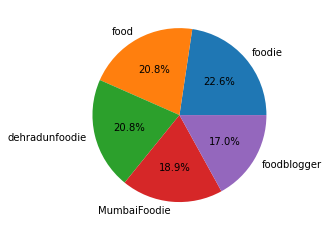

In [129]:
hashname=[]
hashcount=[]
for i in sorted(freq.items(), key = lambda k: k[1],reverse=True)[:5]:     ##top 5 hashtags with their frequency
    hashname.append(i[0])
    hashcount.append(i[1])
    print(i)

plt.pie(hashcount,labels=hashname,autopct="%.1f%%")
plt.show()

## Number of Likes in last 10 posts from above 5 Insta Handles

In [174]:
topfive={}
for i in dict(ans):
    topten=[]
    search=driver.find_element_by_xpath('//span[text()="Search"]')
    search.click()
    time.sleep(1)
    searchfood= driver.find_element_by_xpath('//input[@placeholder="Search"]')
    searchfood.send_keys(i)
    count = 0
    while count <3:
        searchfood.send_keys(Keys.ENTER)                     
        count +=1 # count = count +1
        time.sleep(1)
    media_element = driver.find_element_by_xpath('//div[@class="eLAPa"]')
    media_element.click()
    time.sleep(1)
    for j in range(10):
        try:
            likenum=driver.find_element_by_xpath('//a[@class="zV_Nj"]/span')
            time.sleep(1)
            likes=likenum.text
            likecount=int("".join(likes.split(',')))
            topten.append(likecount)
        except:
            pass
        try:
            views=driver.find_element_by_xpath('//span[@class="vcOH2"]')
            time.sleep(1)
            views.click()
            likenum=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span')
            likes=likenum.text
            likecount=int("".join(likes.split(',')))
            topten.append(likecount)
            but=driver.find_element_by_xpath('//div[@class="QhbhU"]')
            but.click()
            
        except:
            pass
        next_button = driver.find_element_by_xpath('//a[text()="Next"]')
        next_button.click()
        time.sleep(2)
    topfive[i]=topten
    close = driver.find_element_by_xpath('//*[@aria-label="Close"]')
    close.click()
print(topfive)

    

{'foodys': [19976, 17391, 99466, 33163, 1785, 22594, 22210, 46574, 31076, 24424], 'yourfoodlab': [14019, 27050, 25553, 24361, 35354, 34178, 45158, 36341, 34970, 34636], 'mumbaifoodie': [2679, 1316, 2537, 1524, 2057, 2789, 4048, 3709, 5773, 2614], 'delhifoodwalks': [1285, 305, 618, 695, 983, 304, 604, 970, 510, 247], 'food_relating_tales': [304, 258, 302, 229, 355, 241, 151, 317, 391, 134]}


## Average Likes received per Insta Handle

In [183]:

average={}
for i in topfive.keys():
    sum=0
    for items in topfive[i]:
        sum+=items
    averagelikes=sum/10
    average[i]=averagelikes
print(average)
        

{'foodys': 31865.9, 'yourfoodlab': 31162.0, 'mumbaifoodie': 2904.6, 'delhifoodwalks': 652.1, 'food_relating_tales': 268.2}


## Followers:Like(ratio) of above 5 Instagram Handles

In [197]:
foll2like={}
x=dict(ans)
for key in average:
    if key in x:
        foll2like[key]=x[key]/average[key]
print(foll2like)  

{'foodys': 276.3724545674216, 'yourfoodlab': 50.74064565817341, 'mumbaifoodie': 167.1524478413551, 'delhifoodwalks': 210.4692531820273, 'food_relating_tales': 15.850111856823267}


## Graph to show Instagram Handles Vs Followers:Like 

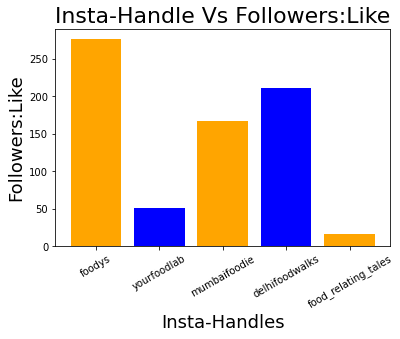

In [203]:
plt.bar(foll2like.keys(),foll2like.values(),width=0.8,color=['orange','blue'])
plt.xticks(rotation=30)
plt.xlabel('Insta-Handles',fontsize=18)
plt.ylabel('Followers:Like',fontsize=18)
plt.title('Insta-Handle Vs Followers:Like',fontsize=22)
plt.show()